# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [65]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [66]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:

# read the data
df = pd.read_csv('/content/drive/MyDrive/mit-pe/foodhub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [69]:
# Write your code here
print('Rows: {rows}\nCols: {cols}'.format(rows=df.shape[0], cols=df.shape[1]))

Rows: 1898
Cols: 9


#### Observations: See code output


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [70]:
# Use info() to print a concise summary of the DataFrame
df.info()
# A: int64, float64 and object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: int64, float64 and object


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [71]:
# Write your code
# Rating should be a number, but in the info() it shows as an object.
# While there isn't any null values, there is mixed values
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [72]:
# Appears ratings is discrete and not continous. So it should be a form of Integer
len(df[df['rating'] == 'Not given'])

736

In [73]:
# 736 is a substantial portion of the population, and my immediate
# desire to change the data appears hasty.

#### Observations:
#### all 9 columns have non-null values of 1898 so there is no remaining null data. Ratings being an object and not an int64 requires attention, but maybe not a change.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [74]:
# Write your code here
df['food_preparation_time'].describe().T

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
##### Minimum = 20 mins
##### Average = 27.37 mins
##### Maximum is 35 mins.


### **Question 5:** How many orders are not rated? [1 mark]

In [75]:
# Write the code here
len(df[df['rating'] == 'Not given'])

736

#### Observations:
#### 736 orders are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]



*   order_id



In [76]:
# Write the code here
len(df['order_id'].unique())

1898

In [77]:
# order_id has 1898 unique values, thus this is used an index column for the data.
# There is no relevant statistial inference that can be made from it

* # customer_id

In [78]:
len(df['customer_id'].unique())

1200

#### Univariate considerations about the id's dont yield
#### much value, however against the counts of those ids will

In [79]:
# since there is less unique customer_id's than total order, that means
# the same customer_id order multiple times

cust_group = df.groupby('customer_id').size().reset_index(name='orders')
cust_group.sort_values(by='orders', ascending=False)

,customer_id,orders
116,52832,13
84,47440,10
333,83287,9
839,250494,8
216,65009,7
...,...,...
478,105903,1
479,105992,1
480,106006,1
481,106324,1


In [80]:
cust_counts = cust_group.groupby('orders').size().reset_index(name='counts')
cust_counts

,orders,counts
0,1,784
1,2,267
2,3,83
3,4,33
4,5,19
5,6,6
6,7,4
7,8,1
8,9,1
9,10,1


In [81]:
cust_counts['percent_total'] = cust_counts['counts'] * cust_counts['orders'] / len(df['order_id'].unique())
cust_counts

,orders,counts,percent_total
0,1,784,0.413066
1,2,267,0.281349
2,3,83,0.131191
3,4,33,0.069547
4,5,19,0.050053
5,6,6,0.018967
6,7,4,0.014752
7,8,1,0.004215
8,9,1,0.004742
9,10,1,0.005269


<Axes: title={'center': 'How many orders unique customers made over 6 months'}, xlabel='Number of Orders', ylabel='Number of Unique Customers'>

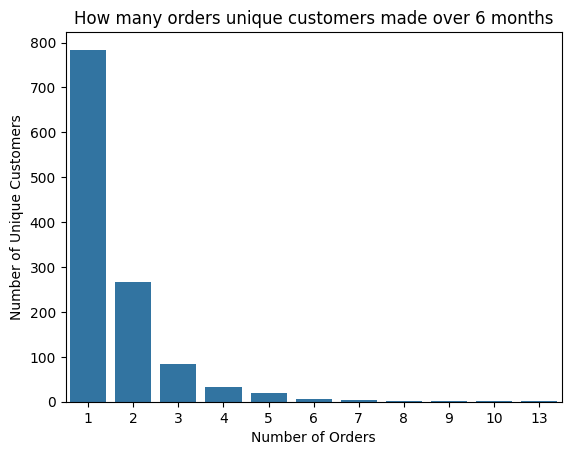

In [82]:
plt.xlabel('Number of Orders')
plt.ylabel('Number of Unique Customers')
plt.title('How many orders unique customers made over 6 months')
sns.barplot(cust_counts, x='orders', y='counts')

This shows that even though we have repeat customers, the overwhelming count of sales is from first and single repeat customers. The distribution is exponential.

* restaurant_name

In [83]:
len(df['restaurant_name'].unique())

178

178 Restaurants does not lend its self to good visualization

In [84]:
rest_group = df.groupby('restaurant_name').size().reset_index(name='ordered_from').sort_values(by='ordered_from', ascending=False)
rest_group['percent_ordered_from'] = rest_group['ordered_from'] / len(df['order_id'].unique())
rest_group

,restaurant_name,ordered_from,percent_ordered_from
136,Shake Shack,219,0.115385
153,The Meatball Shop,132,0.069547
21,Blue Ribbon Sushi,119,0.062698
20,Blue Ribbon Fried Chicken,96,0.050580
109,Parm,68,0.035827
...,...,...,...
85,Klong,1,0.000527
83,Kambi Ramen House,1,0.000527
77,Il Bambino,1,0.000527
76,Hunan Manor,1,0.000527



'restaurant_name's is 178 unique names. The names are discrete, however their row count is in an exponential distribution.

## cuisine_type

In [85]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

<Axes: xlabel='Cuisine Type', ylabel='Number of Orders'>

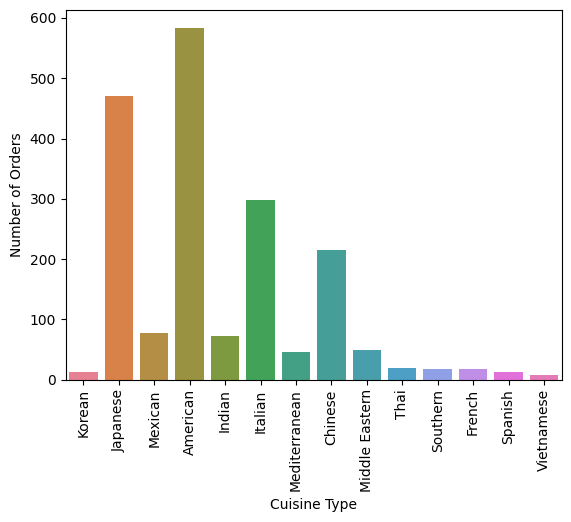

In [86]:
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
sns.countplot(df, x='cuisine_type', hue='cuisine_type')

In [87]:
# Want to see what the top cuisines are and what percentage they are
cuisine_group = df.groupby('cuisine_type').size().reset_index(name='orders').sort_values(by='orders', ascending=False)
cuisine_group['percent_ordered'] = cuisine_group['orders'] / len(df['order_id'].unique())
cuisine_group

,cuisine_type,orders,percent_ordered
0,American,584,0.307692
5,Japanese,470,0.247629
4,Italian,298,0.157007
1,Chinese,215,0.113277
8,Mexican,77,0.040569
3,Indian,73,0.038462
9,Middle Eastern,49,0.025817
7,Mediterranean,46,0.024236
12,Thai,19,0.010011
2,French,18,0.009484


There is a variety of cuisine types, however America, Japanese, Italian and Chinese are the most popular by a margin

## cost_of_the_order

In [88]:
# this is a continuous variable, so describe makes sense
df['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

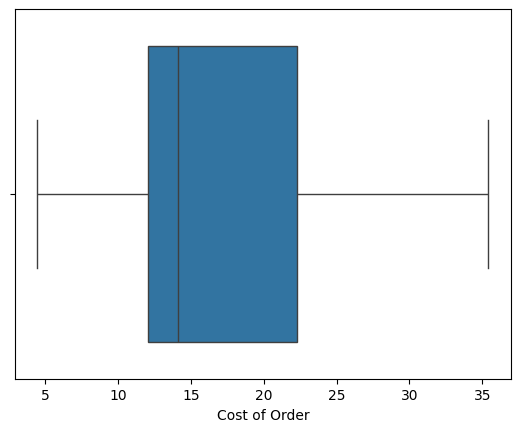

In [89]:
plt.xlabel('Cost of Order')
sns.boxplot(df, x='cost_of_the_order');

Immediately what is apparant is that cost of the orders doesnt have 1.5 IQR outliers. This is probably explained from the restaurants and people who will order food via the app have reached a Nash Equilibrium of sorts.

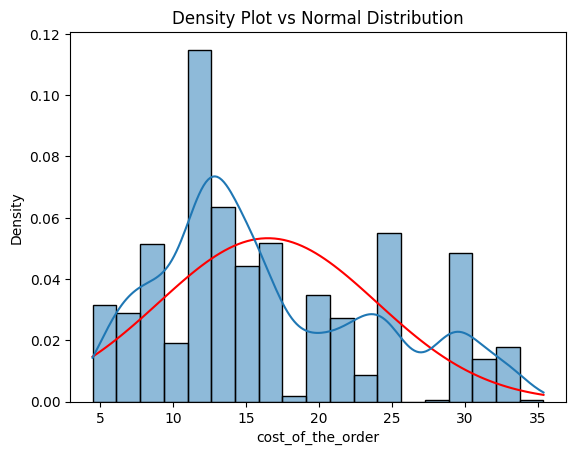

In [90]:
# import the required function
from scipy.stats import norm

# This data frame is just to make the normal curve for the data
density = pd.DataFrame() # create an empty DataFrame
# create an array of 100 numbers in between the min and max score range and store it in the first column of the empty DataFrame
density["x"] = np.linspace(
    df['cost_of_the_order'].min(), df['cost_of_the_order'].max(), 100
)
# calculate the pdf() of the created numbers and store it in another column named 'pdf'
density["pdf"] = norm.pdf(density["x"],
                          df['cost_of_the_order'].mean(),
                          df['cost_of_the_order'].std())

fig, ax = plt.subplots() # create the subplot
ax.plot(density["x"], density["pdf"], color="red") # plot the pdf of the normal distribution
sns.histplot(df['cost_of_the_order'], ax=ax, kde=True, stat="density") # plot the distribution of data using histogram
plt.title("Density Plot vs Normal Distribution") # set the title
plt.show() # display the plot

I was attempting to see if the cost of the orders followed anything close to a normal distribution, they do not. The data appears to have a slight right skew.

## day_of_the_week

In [91]:
df.groupby('day_of_the_week').size()

day_of_the_week
Weekday     547
Weekend    1351
dtype: int64

So weekends even being 2/7ths of the week, make up the majority of the orders. This column is a bit misleading as it is just checking if its the weekend or not, and its a binomial distrubution masquerading as something else. Adding a column to show the binary effect.

Also should be noted, that friday would logically be a busier night for orders, but this metric rolls friday up with monday through thursday.

In [92]:
df['weekend_order'] = df['day_of_the_week'] == 'Weekend'
df.groupby('weekend_order').size()

weekend_order
False     547
True     1351
dtype: int64

<Axes: xlabel='Is the order on the Weekend?', ylabel='count'>

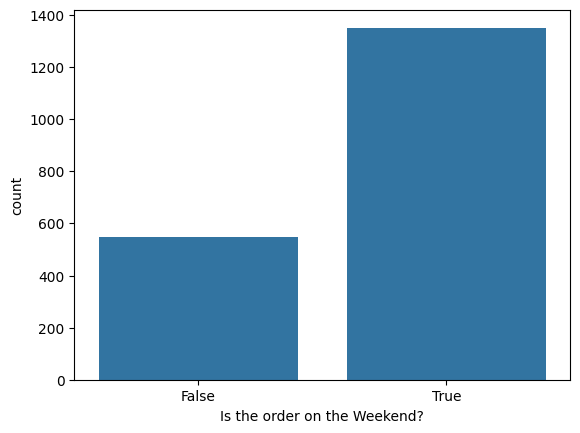

In [93]:
plt.xlabel('Is the order on the Weekend?')
sns.countplot(df, x='weekend_order')

## rating

In [94]:
ratings_group = df.groupby('rating').size().reset_index(name='counts')
ratings_group

,rating,counts
0,3,188
1,4,386
2,5,588
3,Not given,736


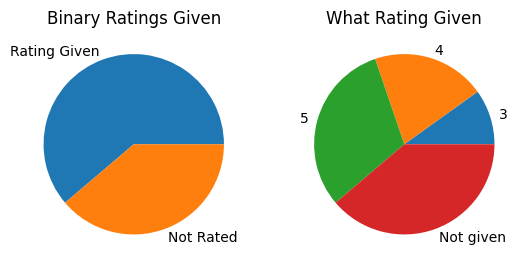

In [95]:
# figure out what the percentages of ratings to non-ratings
num_rated = len(df[df['rating'] != 'Not given'])
num_not_rated = len(df) - num_rated

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title('Binary Ratings Given')
ax1.pie([num_rated, num_not_rated], labels=['Rating Given','Not Rated']);
ax2.set_title('What Rating Given')
ax2.pie(ratings_group['counts'], labels=ratings_group['rating']);

Even though the ratings go from 1-5, people who do actually rate the food are in some degree of liking the food. This implies, but isnt shown, that those who do not like the food do not take time to rate it.

## food_preparation_time

In [96]:
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

<Axes: xlabel='Food Prepartion Time (mins)', ylabel='Orders'>

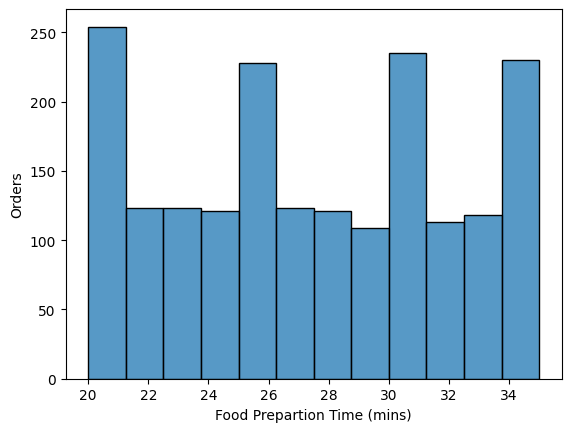

In [97]:
# plot the food preparation times
plt.xlabel("Food Prepartion Time (mins)")
plt.ylabel("Orders")
sns.histplot(df['food_preparation_time'])

I don't know why I expected this to be more normal, but it isn't. Its mostly uniform. This could be a bin issue.

In [98]:
df['food_preparation_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1898 entries, 0 to 1897
Series name: food_preparation_time
Non-Null Count  Dtype
--------------  -----
1898 non-null   int64
dtypes: int64(1)
memory usage: 15.0 KB


It is an int and not a float, which means its actually discrete and not continuous as a variable.

In [99]:
df['food_preparation_time'].unique()

array([25, 23, 20, 28, 33, 21, 29, 34, 24, 30, 35, 32, 31, 27, 22, 26])

In [100]:
df.groupby('food_preparation_time').size()

food_preparation_time
20    119
21    135
22    123
23    123
24    121
25    113
26    115
27    123
28    121
29    109
30    119
31    116
32    113
33    118
34    113
35    117
dtype: int64

In [101]:
food_prep_group = df.groupby('food_preparation_time').size().reset_index(name='counts')
food_prep_group

,food_preparation_time,counts
0,20,119
1,21,135
2,22,123
3,23,123
4,24,121
5,25,113
6,26,115
7,27,123
8,28,121
9,29,109


<Axes: xlabel='food_preparation_time', ylabel='count'>

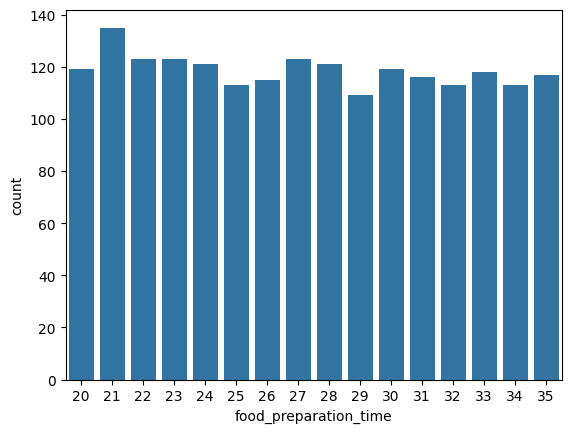

In [102]:
sns.countplot(df, x='food_preparation_time')

The food preparation time is close to uniform.

## delivery_time

In [103]:
df['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

In [104]:
df['delivery_time'].unique()

array([20, 23, 28, 15, 24, 21, 30, 26, 22, 17, 25, 16, 29, 27, 18, 31, 32,
       19, 33])

Like food preparation time, the delivery time is integer and bucketed. Making it discrete and not continuous.

<Axes: xlabel='Delivery Time (min)', ylabel='Number of Deliveries'>

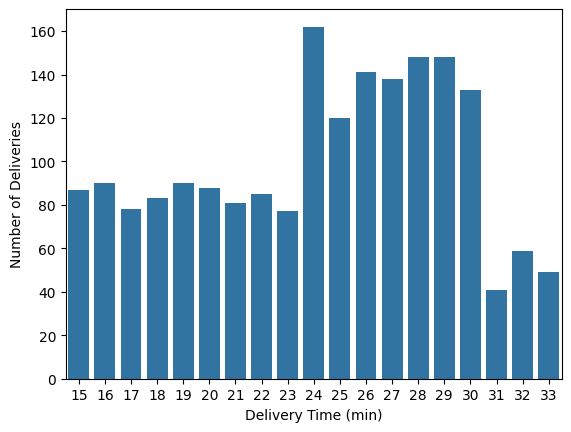

In [105]:
plt.xlabel('Delivery Time (min)')
plt.ylabel('Number of Deliveries')
sns.countplot(df, x='delivery_time')

The 24-30 min grouping appears to be the largest percentage for orders.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [106]:
# Write the code here
rest_group['restaurant_name'].head()

136                  Shake Shack
153            The Meatball Shop
21             Blue Ribbon Sushi
20     Blue Ribbon Fried Chicken
109                         Parm
Name: restaurant_name, dtype: object

 The top 5 restaurants by orders recieved are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [107]:
# Write the code here
df[df['day_of_the_week'] == 'Weekend'].groupby('cuisine_type').size()

cuisine_type
American          415
Chinese           163
French             13
Indian             49
Italian           207
Japanese          335
Korean             11
Mediterranean      32
Mexican            53
Middle Eastern     32
Southern           11
Spanish            11
Thai               15
Vietnamese          4
dtype: int64

#### Observations: On the weekend, American cuisine is the most popular


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [108]:
# Write the code here
total_orders = len(df)
cost_more_than_20 = len(df[df['cost_of_the_order'] > 20])
"{:.3f}".format(cost_more_than_20 / total_orders)

'0.292'

#### Observations: Approximately 29.2% of orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [109]:
print('Mean delivery team is {:.1f} minutes'.format(df['delivery_time'].mean()))

Mean delivery team is 24.2 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [110]:
# group the data by customer_id, get the sizes of each group then create a new frame using the size as 'num_orders', sort by that and grab the top 3
df.groupby('customer_id').size().reset_index(name='num_orders').sort_values(by='num_orders', ascending=False)[0:3]

,customer_id,num_orders
116,52832,13
84,47440,10
333,83287,9


#### Observations: customer_id's 52832, 47440, and 83287 are the top 3 most frequent customers


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


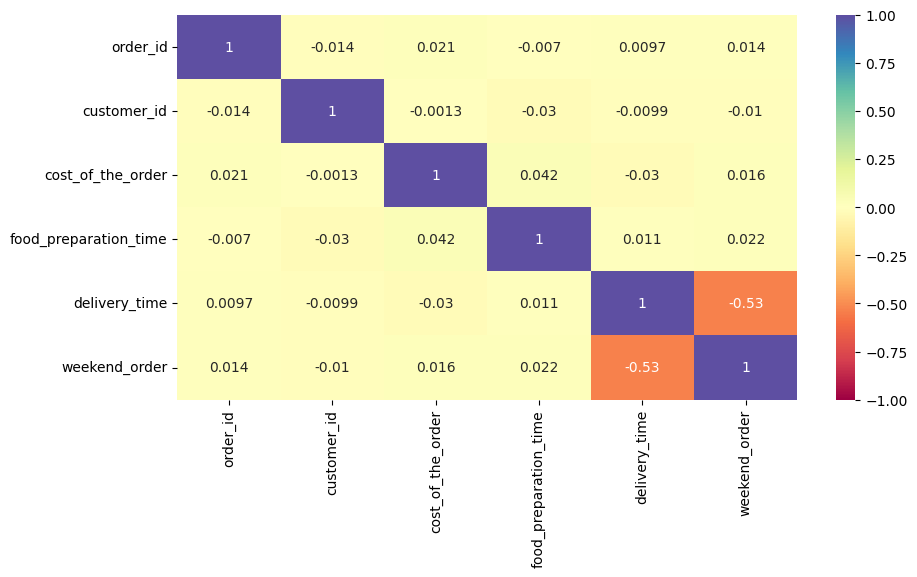

In [111]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

There isnt any immediate strong correlations outside of the order being on the weekend and total delivery time. My addition of that field may help!

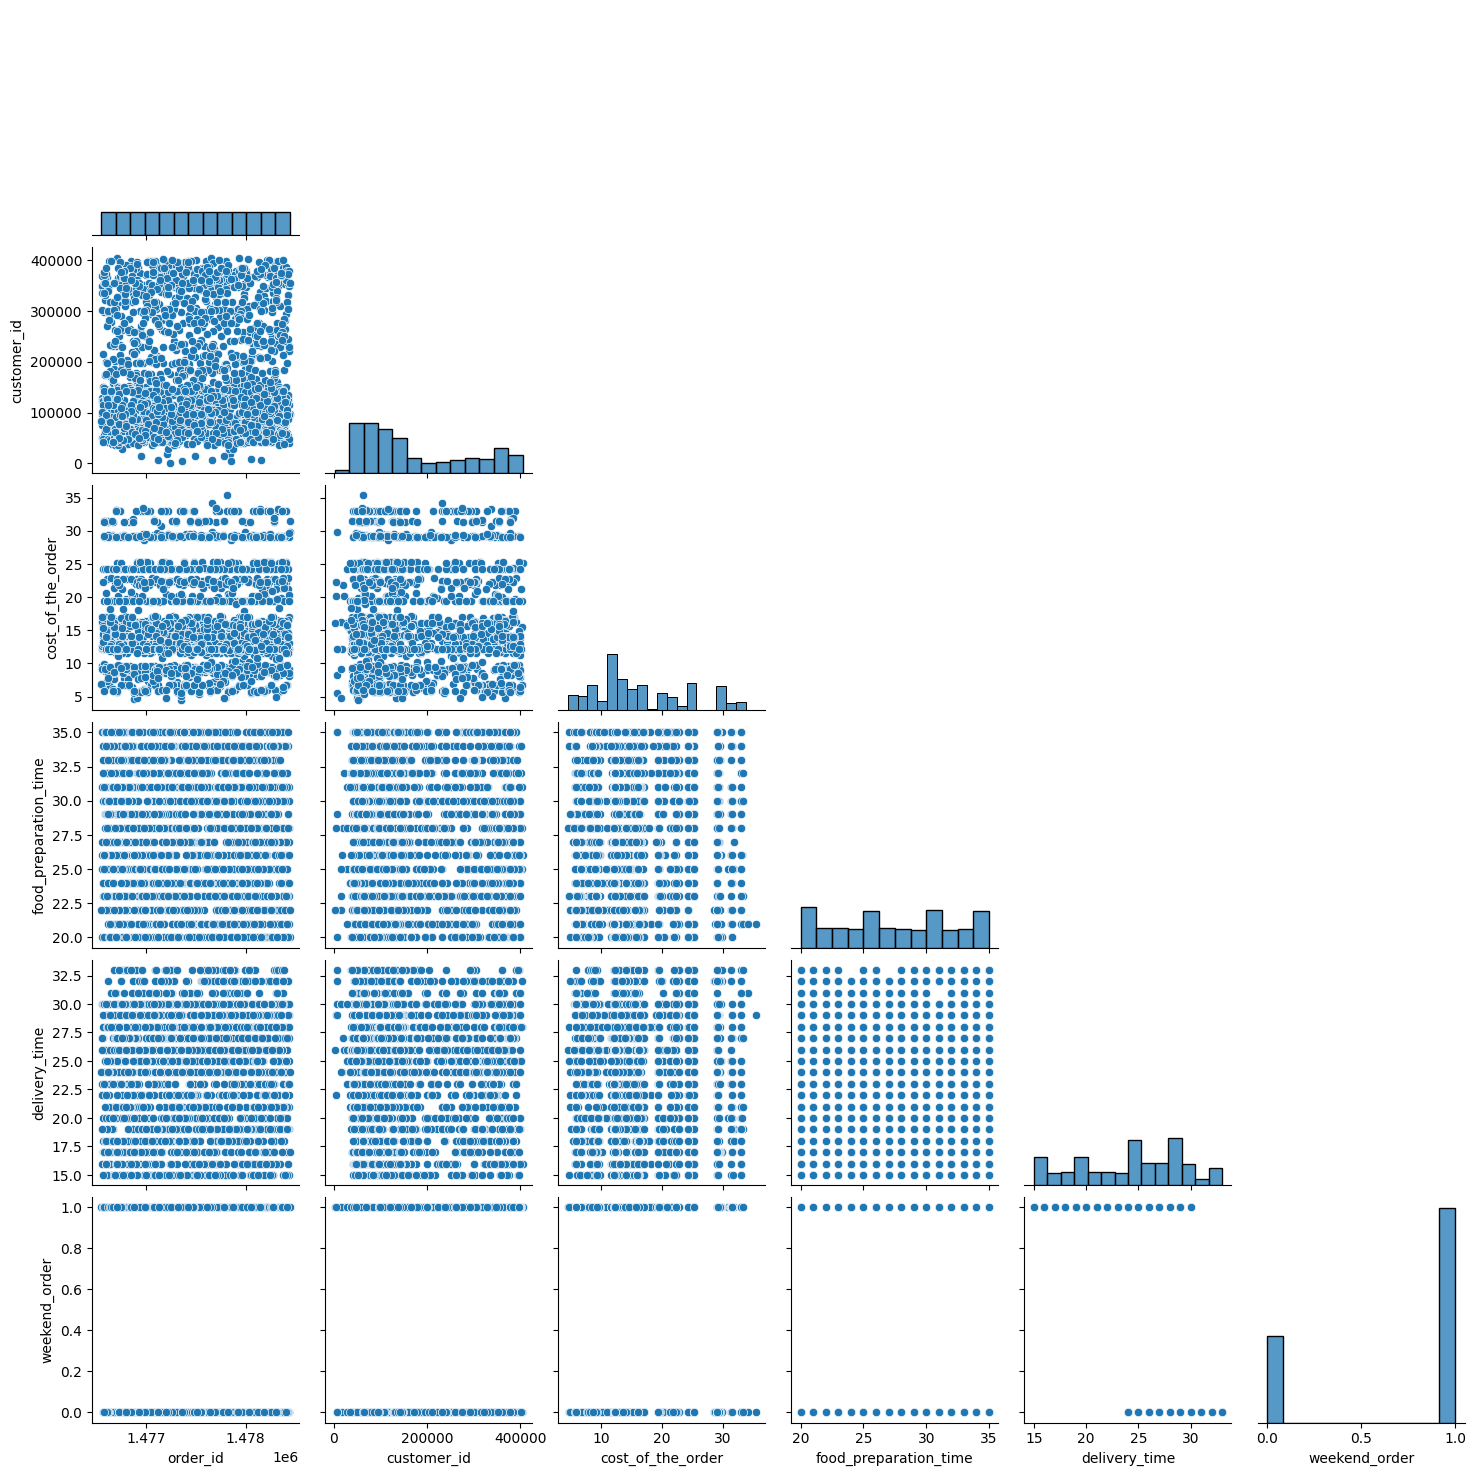

In [112]:
sns.pairplot(df, corner=True)

Pair plot isnt immediately helpful.

In [113]:
weekend_avg_time = df[df['weekend_order']]['delivery_time'].mean()
weekday_avg_time = df[~df['weekend_order']]['delivery_time'].mean()
sigma = df['delivery_time'].std()
mu = df['delivery_time'].mean()
print('Delivery time Mean {:.2f}'.format(mu))
print('Delivery time STD {:.2f}'.format(sigma))
print('Weekend Avg Time {:.2f}'.format(weekend_avg_time))
print('Weekday Avg Time {:.2f}'.format(weekday_avg_time))
z_weekend = (mu - weekend_avg_time) / sigma
z_weekday = (mu - weekday_avg_time) / sigma
print('Weekend Time Z {:.2f}'.format(z_weekend))
print('Weekday Time Z {:.2f}'.format(z_weekday))
print('Separation {:.2f}'.format(abs(z_weekday - z_weekend)))

Delivery time Mean 24.16
Delivery time STD 4.97
Weekend Avg Time 22.47
Weekday Avg Time 28.34
Weekend Time Z 0.34
Weekday Time Z -0.84
Separation 1.18


Having over standard deviation between weekend delivery times and weekday delivery times could be significant. I believe this is noteworthy.

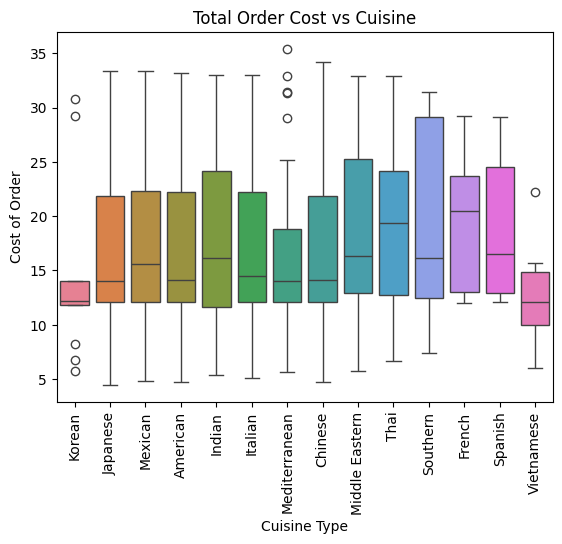

In [114]:
# Write the code here
plt.title('Total Order Cost vs Cuisine')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Order')
sns.boxplot(df, x='cuisine_type', y='cost_of_the_order', hue="cuisine_type");

There doesn't seem to be a noticable trend between cuisine type and cost of order, except korean and vietnamese orders trend lower.

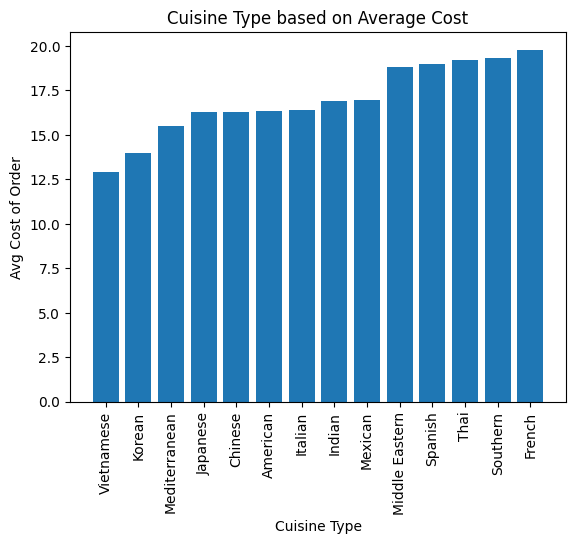

In [115]:
#trying to do this with pyplot alone and no seaborn... for no reason than to just do it
cuisine_group = df.groupby('cuisine_type').mean().sort_values(by='cost_of_the_order')

plt.bar(cuisine_group.index, cuisine_group['cost_of_the_order'])
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Avg Cost of Order')
plt.title('Cuisine Type based on Average Cost')
plt.show()

In order for the company to make more money, they can focus on adding French, Southern, Tahi, Spanish and Middle Eastern restaurants.

<Axes: xlabel='Cuisine Type', ylabel='Average Rating'>

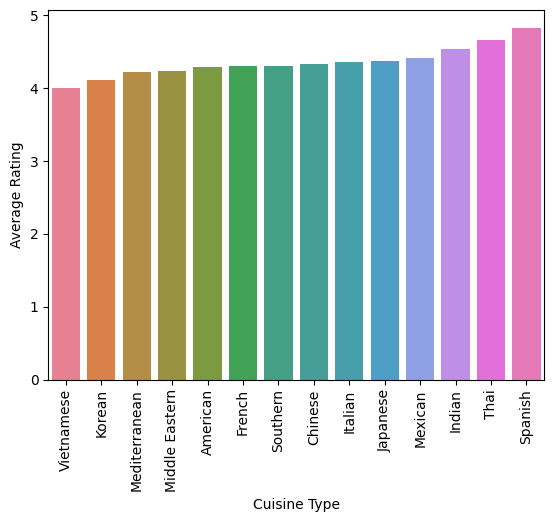

In [116]:
# Write the code here
plt.xticks(rotation=90)
# This chunky piece of code clears out all the 'not given' ratings, converts rating to an int, then organizes the mean ratings by cuisine type in order
rated_df = df[df['rating'] != 'Not given']
rated_df = rated_df.astype({'rating':'int64'})
rated_df = rated_df.groupby('cuisine_type')['rating']
rated_df = rated_df.mean()
rated_df = rated_df.reset_index(name='avg')
rated_df = rated_df.sort_values(by='avg')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
sns.barplot(rated_df, x='cuisine_type', y='avg', hue='cuisine_type')


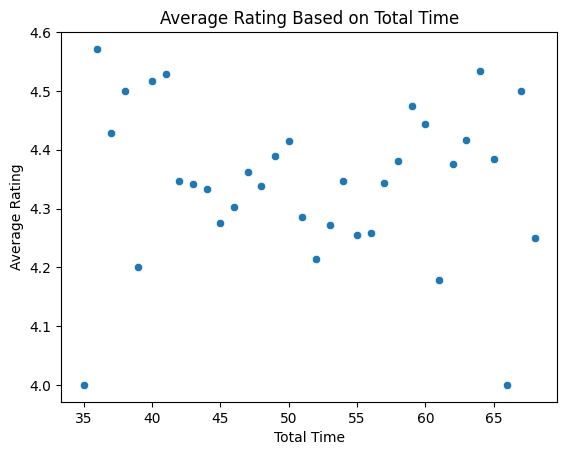

In [117]:
rated_data = df[df['rating'] != 'Not given']
rated_data['time'] = rated_data['delivery_time'] + rated_data['food_preparation_time']
rated_data = rated_data.astype({'rating': 'int64'})
rated_data = rated_data.groupby('time')['rating'].mean().reset_index(name='avg')
plt.title('Average Rating Based on Total Time')
plt.xlabel('Total Time')
plt.ylabel('Average Rating')
sns.scatterplot(rated_data, x='time', y='avg');

In [118]:
unrated_data = df[df['rating'] == 'Not given']
unrated_data['time'] = unrated_data['delivery_time'] + unrated_data['food_preparation_time']
(rated_data['time'].mean(), unrated_data['time'].mean())

(51.5, 51.53125)

Avg Time doesn't have a real impact on whether an item will be rated or not

In [119]:
# Check if weekends have more or less ratings
rated_data = df[df['rating'] != 'Not given']
rated = pd.DataFrame()
rated_weekend= rated_data[rated_data['weekend_order']]['rating'].astype('int64')
rated_weekday = rated_data[rated_data['weekend_order'] == False]['rating'].astype('int64')
print('Weekday Median: {}'.format(rated_weekday.median()))
print('Weekday Mean: {}'.format(rated_weekday.mean()))
print('Weekend Median: {}'.format(rated_weekend.median()))
print('Weekend Mean: {}'.format(rated_weekend.mean()))


Weekday Median: 4.0
Weekday Mean: 4.3088235294117645
Weekend Median: 5.0
Weekend Mean: 4.358880778588808


The Median seems to be the only central tendancy that is moving between weekend and weekday ratings.

There doesnt appear to be a correlation between total time to get food vs rating. This implies that restaurants which get rated, are doing a good job of preparing food that can withstand varying times and people are not allowing the time frame to change their rating.

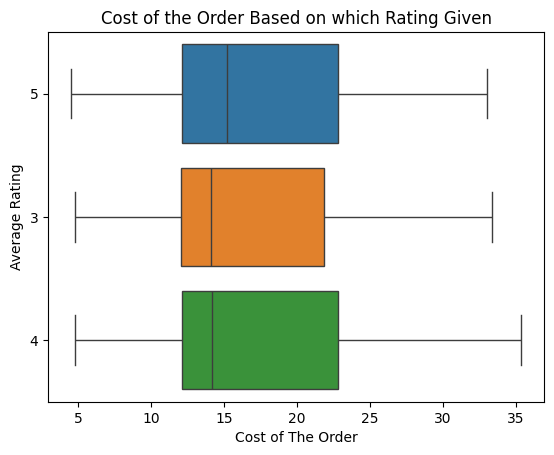

In [120]:
rated_data = df[df['rating'] != 'Not given']
plt.title('Cost of the Order Based on which Rating Given')
plt.xlabel('Cost of The Order')
plt.ylabel('Average Rating')
sns.boxplot(rated_data, x='cost_of_the_order', y='rating', hue="rating");

Of the ratings given the cost of the order doesn't seem to have a large influence on the what the rating is.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [121]:
# Find all the rated rated rows
rated_data = df[df['rating'] != 'Not given']
# group them by restaurant
rest_ratings = rated_data.groupby('restaurant_name').size()
# pull out only the restaurants with > 50 rows
more_than_50_ratings = rated_data[rated_data['restaurant_name'].isin((rest_ratings[rest_ratings > 50]).index.array)]
# Convert rating to int64 so we can do math on them
more_than_50_ratings['rating'] = more_than_50_ratings['rating'].astype('int64')
# Get the mean of the values
top_rests = more_than_50_ratings.groupby('restaurant_name')['rating'].mean()
# Sort descending
top_rests.sort_values(ascending=False)

restaurant_name
The Meatball Shop            4.511905
Blue Ribbon Fried Chicken    4.328125
Shake Shack                  4.278195
Blue Ribbon Sushi            4.219178
Name: rating, dtype: float64

#### Observations: The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi are restaurants with more than 50 ratings and > 4 average rating

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [122]:
# Find all the orders over 20 and all the orders over 5 but less than or equal to 20
orders_over_20 = df[df['cost_of_the_order'] > 20.0]
orders_over_5 = df[(df['cost_of_the_order'] > 5.0) & (df['cost_of_the_order'] <= 20.0)]
# Add them together
(orders_over_20['cost_of_the_order'].sum() * 0.25) + (orders_over_5['cost_of_the_order'].sum() * 0.15)

6166.303

#### Observations: Total revenue is $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [123]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
orders_over_60 = len(df[df['total_time'] > 60])
"{:.2f}% of orders take over 60 mins".format((orders_over_60 / len(df)) * 100)

'10.54% of orders take over 60 mins'

#### Observations: 10.54% of orders take over 60 mins


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [124]:
# Write the code here
weekend_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
weekday_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
(weekend_time, weekday_time, weekday_time - weekend_time)

(22.4700222057735, 28.340036563071298, 5.870014357297798)

#### Observations: Weekday mean delivery time is ~5.9 minutes slower than weekend mean delivery time


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
1. There is more orders on "weekends".
2. There is a difference for mean delivery times on weekends vs weekdays. This could be due to #1.
3. Ratings don't show correlation to total time to get to delivery. So these longer delivery times don't seem to affect rating.
4. Most money on average per order is at French, Southern, Tahi, Spanish and Middle Eastern restaurants.






### Recommendations:

* Increasing dollars spend per order can be done by focusing adding on French, Southern, Tahi, Spanish and Middle Eastern restaurants.
* Expanding to restaurants open during the weekenday could increase weekday orders.
* Increase number of drivers on weekends to see if that reduces delivery times.
* Increase number of ratings by offering some form of incentive to those who post reviews of orders.
* Have ratings include driver specific ratings (communication, hand-off, etc)


---

In [125]:
!pip install nbconvert
!jupyter nbconvert /content/drive/MyDrive/mit-pe/foodhub/julian_assignment_foodhub.ipynb --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/mit-pe/foodhub/julian_assignment_foodhub.ipynb to html
[NbConvertApp] Writing 1127014 bytes to /content/drive/MyDrive/mit-pe/foodhub/julian_assignment_foodhub.html
